#### Импорт библиотек

In [1]:
import tensorflow as tf

print(tf.config.list_physical_devices("GPU"))

[]


In [3]:
# Импорт библиотек
#%pip install matplotlib

import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator)
# Настройка представления
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### Получение полигармонического сигнала
$$X(t_k) = A \sum_{i = 1}^5 \sin(2\pi f_i t_k)$$


In [5]:
A = 10
f1 = 10
f2 = 21
f3 = 18
f4 = 23
f5 = 16

N = 256 # Количество отсчетов
i = np.arange(N) # Массив номеров отсчетов 1..N
f = np.array([f1, f2, f3, f4, f5]) # Массив частот составляющих полигармонического сигнала
num_period = 0.4
T = 1/min(f) * 0.01 * num_period# Период дискретизации сигнала

# Генерируем полигармонический сигнал
X = 0
for k in np.arange(f.size):
  X += np.sin(2*np.pi*f[k]*T*i)
X *= A/f.size # Приводим сигнал к заданной амплитуде

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_title('Полигармонический сигнал X(t)', fontsize=14)
ax.set_xlabel('t [сек]', fontsize=12)
ax.set_ylabel('X(t) [В]', fontsize=12)
ax.plot(i*T, X)
ax.plot([i[0]*T, i[-1]*T], [A, A], 'r-*', linewidth=1, alpha=0.3)
ax.plot([i[0]*T, i[-1]*T], [-A, -A], 'r-*', linewidth=1, alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)


NameError: name 'np' is not defined

#### Наложение шума на сигнал

In [ ]:
noise_level = 0.15
rng = np.random.default_rng(12340)
noise = rng.normal(0, A*noise_level, N)

# Накладываем шум на полезный сигнал и строим график
Xn = X + noise
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.set_title('Полигармонический сигнал X(t)', fontsize=14)
ax.set_xlabel('t [сек]', fontsize=12)
ax.set_ylabel('X(t), Xn(t) [В]', fontsize=12)
ax.plot(i*T, Xn, label='Сигнал c шумом Xn(t)')
ax.plot(i*T, X, label='Сигнал без шума X(t)')
ax.plot([i[0]*T, i[-1]*T], [A, A], 'r-*', linewidth=1, alpha=0.3)
ax.plot([i[0]*T, i[-1]*T], [-A, -A], 'r-*', linewidth=1, alpha=0.3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
ax.legend()
#fig.savefig(r'fig_3.png')

#### Генерация обучающей выборки (чистые сигналы)

In [ ]:
# размер выборки
num_samples = 200000


# Other configuration
num_samples_visualize = 2

# Containers for samples and subsamples
samples = []

# Generate samples
print("Сгенерировано:")
for j in range(0, num_samples):
  # Report progress
    if j % 10000 == 0:
        print(j)
        
  # Generate wave
    A = np.random.uniform(2.5,20)
    start_f = np.random.randint(10, 100)
    step = np.random.randint(10, 30)
    f = np.array([start_f, start_f+step, start_f+2*step, start_f+3*step, start_f+4*step]) # Массив частот составляющих полигармонического сигнала

    N = 200 # Количество отсчетов
    i = np.arange(N) # Массив номеров отсчетов 1..N

    # взято полпериода
    num_period = 1
    T = 1/min(f) * 0.01 * num_period# Период дискретизации сигнала
    
    # Генерируем полигармонический сигнал
    X = 0
    for k in np.arange(f.size):
        X += np.sin(2*np.pi*f[k]*T*i)
    X *= A/f.size # Приводим сигнал к заданной амплитуде
    
    samples.append((i*T, X))



print(np.shape(np.array(samples[0][0])))
  

np.save('./signal_waves.npy', samples)

# Visualize a few random samples
for i in range(0, num_samples_visualize):
    random_index = np.random.randint(0, len(samples)-1)
    x_axis, y_axis = samples[random_index]
    plt.plot(x_axis, y_axis)
    plt.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
    plt.title(f'Visualization of sample {random_index}')
    plt.show()

### Данные с шумом

In [ ]:

num_samples_visualize = 3


data = np.load('./signal_waves.npy')
x_val, y_val = data[:,0], data[:,1]

# Add noise to data
noisy_samples = []
print("Сгенерировано:")
for i in range(0, len(x_val)):
    noise_factor = np.random.uniform(0.15,0.25)
    if i % 10000 == 0:
        print(i)
    pure = np.array(y_val[i])
    noise = np.random.normal(0, A*noise_factor, pure.shape)
    signal = pure + noise
    noisy_samples.append([x_val[i], signal])
  

np.save('./signal_waves_noisy.npy', noisy_samples)

# Visualize a few random samples
for i in range(0, num_samples_visualize):
    random_index = np.random.randint(0, len(noisy_samples)-1)
    x_axis, y_axis = noisy_samples[random_index]
    plt.plot(x_axis, y_axis)
    plt.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
    plt.title(f'Visualization of noisy sample {random_index} ---- y: f(x)')
    plt.show()

### Обработка данных

#### Импорт библиотек

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.constraints import max_norm
#import matplotlib.pyplot as plt
import numpy as np
import math

#print(tf.config.list_physical_devices('GPU') )

In [ ]:
input_shape = (200, 1)
batch_size = 200 #150
no_epochs = 8
train_test_split = 0.3
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0

data_noisy = np.load('./signal_waves_noisy.npy')
x_val_noisy, y_val_noisy = data_noisy[:,0], data_noisy[:,1]
data_pure = np.load('./signal_waves.npy')
x_val_pure, y_val_pure = data_pure[:,0], data_pure[:,1]

# Reshape data
y_val_noisy_r = []
y_val_pure_r = []
for i in range(0, len(y_val_noisy)):
    noisy_sample = y_val_noisy[i]
    pure_sample = y_val_pure[i]
    noisy_sample = (noisy_sample - np.min(noisy_sample)) / (np.max(noisy_sample) - np.min(noisy_sample))
    pure_sample = (pure_sample - np.min(pure_sample)) / (np.max(pure_sample) - np.min(pure_sample))
    y_val_noisy_r.append(noisy_sample)
    y_val_pure_r.append(pure_sample)
    
y_val_noisy_r = np.array(y_val_noisy_r)
y_val_pure_r = np.array(y_val_pure_r)
noisy_input = y_val_noisy_r.reshape((y_val_noisy_r.shape[0], y_val_noisy_r.shape[1], 1))
pure_input = y_val_pure_r.reshape((y_val_pure_r.shape[0], y_val_pure_r.shape[1], 1))

percentage_training = math.floor((1 - train_test_split) * len(noisy_input))
noisy_input, noisy_input_test = noisy_input[:percentage_training], noisy_input[percentage_training:]
pure_input, pure_input_test = pure_input[:percentage_training], pure_input[percentage_training:]
print("all data normalize")

#### Создание **autoencoder**
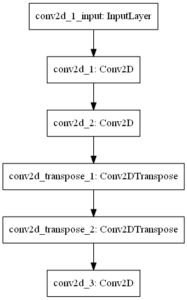

In [ ]:
model = Sequential()
model.add(Conv1D(128, kernel_size=4, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv1D(32, kernel_size=4, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(32, kernel_size=4, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1D(128, kernel_size=4, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(128, kernel_size=4, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(128, kernel_size=4, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1D(1, kernel_size=4, kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))
model.summary()


# model = Sequential()

# # Увеличиваем количество фильтров в первом сверточном слое
# model.add(Conv1D(256, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
# model.add(Conv1D(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))

# # Добавляем дополнительные сверточные слои
# model.add(Conv1D(64, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))

# # Начинаем транспонированные слои (Conv1DTranspose) для декодирования
# model.add(Conv1DTranspose(64, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
# model.add(Conv1DTranspose(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))

# # Добавляем больше фильтров в транспонированные слои
# model.add(Conv1DTranspose(256, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))

# # Финальный слой для восстановления формы выхода
# model.add(Conv1D(1, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))

# model.summary()

### Второй вариант архитектуру модели

In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Dropout, BatchNormalization, Dense, LSTM

# def create_better_autoencoder(input_shape):
#     inputs = Input(shape=input_shape)
    
#     # Encoder
#     x = Conv1D(32, 3, activation="relu", padding="same")(inputs)
#     x = BatchNormalization()(x)
#     x = MaxPooling1D(2, padding="same")(x)
    
#     x = Conv1D(64, 3, activation="relu", padding="same")(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling1D(2, padding="same")(x)
    
#     x = Conv1D(128, 3, activation="relu", padding="same")(x)
#     x = BatchNormalization()(x)
#     x = Dropout(0.3)(x)  # Dropout для регуляризации
    
#     x = LSTM(128, return_sequences=True)(x)
#     x = LSTM(128, return_sequences=True)(x)
    
#     # Decoder
#     x = Conv1DTranspose(128, 3, activation="relu", padding="same")(x)
#     x = BatchNormalization()(x)
#     x = UpSampling1D(2)(x)
    
#     x = Conv1DTranspose(64, 3, activation="relu", padding="same")(x)
#     x = BatchNormalization()(x)
#     x = UpSampling1D(2)(x)
    
#     x = Conv1DTranspose(32, 3, activation="relu", padding="same")(x)
#     x = BatchNormalization()(x)
    
#     # Выходной слой
#     decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(x)

#     # Создание и компиляция модели
#     autoencoder = Model(inputs, decoded)
#     autoencoder.compile(optimizer='adam', loss='mse')
    
#     return autoencoder

# input_shape = (200, 1)  # Пример, замените на вашу реальную размерность
# model = create_better_autoencoder(input_shape)
# model.summary()


#### Компилирование модели

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(noisy_input, pure_input,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

model.save('model_start_gpu.keras')


## Дообучение

In [ ]:

# model = load_model('model_start.keras')
# no_epochs = 10
# model.fit(noisy_input, pure_input,
#                epochs=no_epochs,
#                batch_size=batch_size,
#                validation_split=validation_split)
# model.save('model_period.keras')

### Фильтрация скользящим средним

In [ ]:
def exponential_moving_avereage(data, smooth_interval = 2):
    if smooth_interval >= len(data):
        print("Smooth interval more or equal array lenght!")
        return
    
    alpha = 2.0/(smooth_interval+1)
    filtered_values = np.zeros(len(data))
    sum = 0

    for step in range(smooth_interval):
        sum += data[step]
    previous_ma_value = sum/smooth_interval

    for step in range(smooth_interval-1):
        previous_ma_value = alpha*data[step]+(1-alpha)*previous_ma_value
        filtered_values[step] = previous_ma_value

    sum = 0

    for step in range(smooth_interval):
        sum += data[step]
    previous_ma_value = sum/smooth_interval
    filtered_values[smooth_interval-1] = previous_ma_value

    for step in range(smooth_interval, len(data)):
        previous_ma_value = alpha*data[step]+(1-alpha)*previous_ma_value
        filtered_values[step] = previous_ma_value

    return filtered_values
window_size = 2

### Проверка предсказания

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = load_model('model_start.keras')
num_reconstructions = 6
samples_pure = pure_input_test[:1000]
samples_noisy = noisy_input_test[:1000]
reconstructions = model.predict(samples_noisy)
# Plot reconstructions
for i in np.arange(0, num_reconstructions):
    # Prediction index
    prediction_index = np.random.randint(1, 1000)
    print(prediction_index)
    # Get the sample and the reconstruction
    original = np.array(samples_pure[prediction_index]).reshape(200, 1)
    noisy = np.array(samples_noisy[prediction_index]).reshape(200,1)
    reconstruction = np.array(reconstructions[prediction_index]).reshape(200,1)
    avereage = np.array(exponential_moving_avereage(noisy, 2)).reshape(200,1)
    
    # Matplotlib preparations
    fig, axes = plt.subplots(1, 4, dpi=300)
      # Plot sample and reconstruciton
    axes[0].plot(noisy)
    axes[0].set_ylabel('Зашумленный сигнал', fontsize=10)
    axes[1].plot(original)
    axes[1].set_ylabel('Чистый сигнал', fontsize=10)
    axes[2].plot(reconstruction)
    axes[2].set_ylabel('Очищенный сигнал (AutoEncoder)', fontsize=10)
    axes[3].plot(avereage)
    axes[3].set_ylabel('Очищенный сигнал(Скользящее среднее)', fontsize=10)
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
    axes[0].grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
    axes[1].grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
    axes[2].xaxis.set_minor_locator(AutoMinorLocator())
    axes[2].yaxis.set_minor_locator(AutoMinorLocator())
    axes[2].grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
    axes[2].grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
    axes[3].xaxis.set_minor_locator(AutoMinorLocator())
    axes[3].yaxis.set_minor_locator(AutoMinorLocator())
    axes[3].grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
    axes[3].grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)  
    plt.tight_layout()
    fig.savefig(r'fig_' + str(prediction_index) + '.png')
    plt.show()
    
    errorX = np.abs(original - noisy)
    # Ошибка между сигналом без шума и восстановленным сигналом
    errorX0 = np.abs(original - reconstruction)
    errorX1 = np.abs(original - avereage)
    
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    ax.set_title('Ошибка между сигналами E(t)', fontsize=14)
    ax.set_xlabel('t [сек]', fontsize=12)
    ax.set_ylabel('E(t)', fontsize=12)
    ax.plot(errorX, label='Ошибка между сигналом без шума и сигналом с шумом')
    ax.plot(errorX0, label='Ошибка между сигналом без шума и восстановленным сигналом с помощью автоэнкодера')

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
    ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
    ax.legend()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    ax.set_title('Ошибка между сигналами E(t)', fontsize=14)
    ax.set_xlabel('t [сек]', fontsize=12)
    ax.set_ylabel('E(t)', fontsize=12)
    ax.plot(errorX0, label='Ошибка между сигналом без шума и восстановленным сигналом с помощью автоэнкодера')
    ax.plot(errorX1, label='Ошибка между сигналом без шума и EMA')

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major', color='blue', linewidth=0.75, alpha=0.3)
    ax.grid(which='minor', linestyle='--', color='blue', linewidth=0.5, alpha=0.3)
    ax.legend()
    fig.savefig(r'fig1_' + str(prediction_index) + '.png')

    # Расчет статистических характеристик
    print('R2 error original/noise: {:.4f}\n'.format(r2_score(original, noisy)))
    print('R2 error original/reconstruction: {:.4f}\n'.format(r2_score(original, reconstruction)))
    print('R2 error original/EMA: {:.4f}\n'.format(r2_score(original, avereage)))
    print('MAE error  original/noise: {:.4f}\n'.format(mean_absolute_error(original, noisy)))
    print('MAE error original/reconstruction: {:.4f}\n'.format(mean_absolute_error(original, reconstruction)))
    print('MAE error original/EMA: {:.4f}\n'.format(mean_absolute_error(original, avereage)))
    print('MSE error original/noise : {:.4f}\n'.format(mean_squared_error(original, noisy)))
    print('MSE error original/reconstruction: {:.4f}\n'.format(mean_squared_error(original, reconstruction)))
    print('MSE error original/EMA: {:.4f}\n'.format(mean_squared_error(original, avereage)))
